# KPMG

# Sprocket Central Pty Ltd
# Data Quality Assessment
# Assessment of data quality and completeness in preparation for analysis

The market segmentation is a group of people that have things in commom.
They have a commom set of needs that would be fulfilling through a product.

Customer segmentation is a method of dividing customers into groups, clusters on the basis of common characteristics. 

The market researcher can to segment different consumers using various characteristics such as occupation, gender, age, location, region and based in their buying patterns.

The dataset used in this notebook is the source file https://www.theforage.com/virtual-internships/m7W4GMqeT3bh9Nb2c?ref=WLAKhbpE2WPtZmHpo.

In [127]:
import pandas as pd
import numpy as np
from functools import reduce
from scipy import stats
from scipy.stats import skew
from scipy.stats import kurtosis
from scipy.stats import iqr
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style(style="darkgrid")
from matplotlib import style
from datetime import datetime
import datetime as dt
from sklearn import metrics
from sklearn.cluster import KMeans
from scipy.cluster import hierarchy
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import pdist
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram,linkage,cophenet

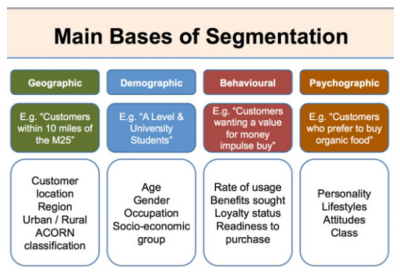

In [4]:
image = plt.imread("../input/imagefile/market_segmentation.png")
plt.imshow(image)
plt.axis("off")  
plt.tight_layout()
plt.show()

In [5]:
df_transactions = pd.read_excel("../input/kpmg-virtual-internship-program/KPMG.xlsx",
                                engine="openpyxl", 
                                sheet_name="Transactions",
                                parse_dates=["transaction_date"])

In [6]:
df_transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [7]:
df_transactions.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date'],
      dtype='object')

In [8]:
df_transactions = df_transactions.drop(df_transactions.iloc[:,13:256], axis=1)

In [9]:
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [10]:
df_transactions.loc[:,['list_price', 'standard_cost']].describe()

,list_price,standard_cost
count,20000.000000,19803.000000
mean,1107.829449,556.046951
std,582.825242,405.955660
min,12.010000,7.210000
25%,575.270000,215.140000
50%,1163.890000,507.580000
75%,1635.300000,795.100000
max,2091.470000,1759.850000


In [11]:
df_transactions.shape

(20000, 13)

In [12]:
df_transactions.isna().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [13]:
df_transactions.dropna(subset=["transaction_date"], inplace=True)

Skewness refers to the measure of the extent of asymmetry in the data distribution 
It is the degree of distortion from the symmetrical bell curve, normal distribution

Negative skew

Left-skewed distribution

In [14]:
df_transactions["list_price"].skew()

-0.1258038249318863

Positive skew

Right-skewed distibution

In [15]:
#The skew is in between 0.5 and 1 then slightly skewed 
df_transactions["standard_cost"].skew()

0.8641416901835327

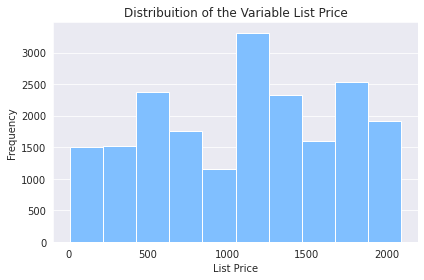

In [16]:
plt.hist(df_transactions["list_price"], color="#80bfff")
plt.grid(b=False, axis="x")
plt.xlabel("List Price")
plt.ylabel("Frequency")
plt.title("Distribuition of the Variable List Price")
plt.tight_layout()
plt.show()

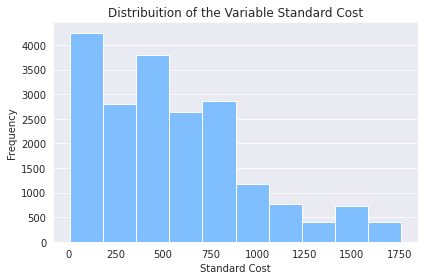

In [17]:
plt.hist(df_transactions["standard_cost"], color="#80bfff")
plt.grid(b=False, axis="x")
plt.xlabel("Standard Cost")
plt.ylabel("Frequency")
plt.title("Distribuition of the Variable Standard Cost")
plt.tight_layout()
plt.show()

# Detecting the outlier

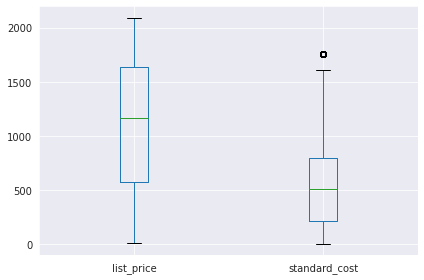

In [18]:
df_transactions.boxplot(column=["list_price", "standard_cost"])
plt.tight_layout()
plt.show()

In [19]:
df_transactions[df_transactions[("standard_cost")]== 1759.85]

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
59,60,60,3473,2017-12-18,0.0,Approved,Giant Bicycles,Standard,high,small,1977.36,1759.85,41848.0
142,143,60,2135,2017-01-26,1.0,Approved,Giant Bicycles,Standard,high,small,1977.36,1759.85,41047.0
291,292,64,3380,2017-10-28,0.0,Approved,Giant Bicycles,Standard,high,small,1977.36,1759.85,42172.0
412,413,60,720,2017-09-09,0.0,Approved,Giant Bicycles,Standard,high,small,1977.36,1759.85,41848.0
698,699,60,1535,2017-08-13,0.0,Approved,Giant Bicycles,Standard,high,small,1977.36,1759.85,40779.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19190,19191,60,3411,2017-06-23,0.0,Approved,Giant Bicycles,Standard,high,small,1977.36,1759.85,40410.0
19551,19552,64,844,2017-08-09,0.0,Approved,Giant Bicycles,Standard,high,small,1977.36,1759.85,40779.0
19705,19706,60,54,2017-10-24,0.0,Approved,Giant Bicycles,Standard,high,small,1977.36,1759.85,42172.0
19722,19723,60,1841,2017-01-03,1.0,Approved,Giant Bicycles,Standard,high,small,1977.36,1759.85,40779.0


In [20]:
mean = np.mean(df_transactions["standard_cost"], axis=0)
median = np.nanmedian(df_transactions["standard_cost"], axis=0)
sd = np.std(df_transactions["standard_cost"], axis=0)

In [21]:
print(round(mean))

556


In [22]:
print(round(median))

508


In [23]:
print(round(sd))

406


The interquartile range (IQR) is the difference between the 75th and 25th percentile of the data 

It is a measure of the dispersion similar to standard deviation or variance

In [24]:
IQR = iqr(df_transactions["standard_cost"], rng=(25,75), nan_policy ="omit",interpolation='midpoint')

In [25]:
print(round(IQR))

580


# List Price :
This is a monetary amount that is based on the list or sales price. Quote, order, and invoice prices are generated from this information.

# Standard Cost: 
This is a monetary amount that is based on the typical cost of the item. Quote, order, and invoice prices are generated from this information.

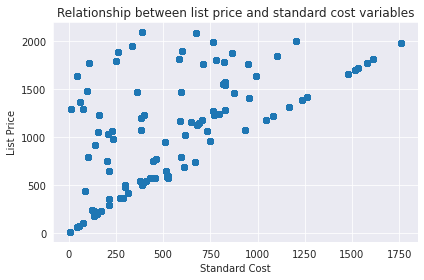

In [26]:
plt.scatter(x=df_transactions["standard_cost"], y=df_transactions["list_price"])
plt.title("Relationship between list price and standard cost variables")
plt.xlabel("Standard Cost")
plt.ylabel("List Price")
plt.tight_layout()
plt.show()

In [27]:
df_transactions["brand"].value_counts(ascending=True)

Norco Bicycles    2910
Trek Bicycles     2990
OHM Cycles        3043
WeareA2B          3295
Giant Bicycles    3312
Solex             4253
Name: brand, dtype: int64

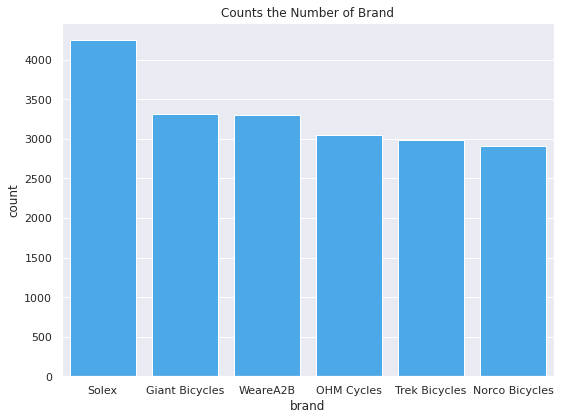

In [28]:
plt.rcParams['figure.figsize'] = (8,6)
sns.set_theme(style="darkgrid")
sns.countplot(x="brand", data=df_transactions,
              order=["Solex","Giant Bicycles","WeareA2B","OHM Cycles","Trek Bicycles","Norco Bicycles"],
              color="#33adff")
plt.title("Counts the Number of Brand")
plt.grid(b=False, axis="x")
plt.tight_layout()
plt.show()

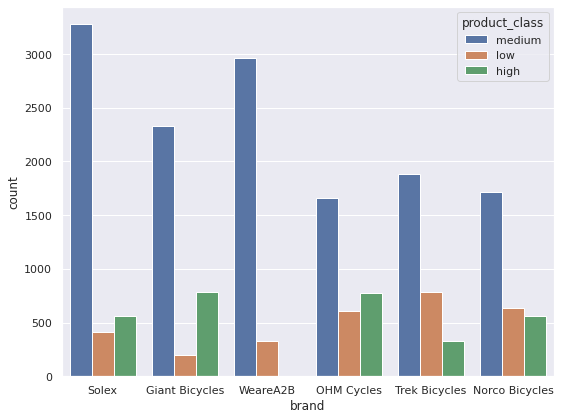

In [29]:
sns.countplot(x="brand",hue="product_class",data=df_transactions,
             order=df_transactions["brand"].value_counts().index)
plt.tight_layout()
plt.show()

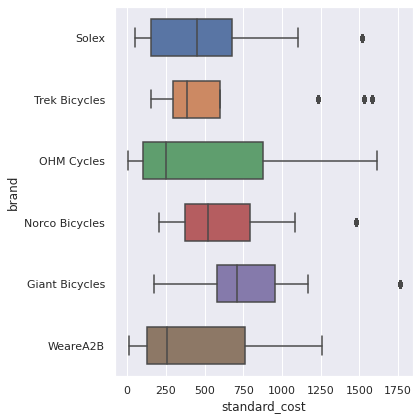

In [30]:
plt.rcParams['figure.figsize'] = (6,6)
sns.boxplot(x="standard_cost", y="brand", data=df_transactions, width=0.6)
plt.tight_layout()
plt.show()

In [31]:
date_order = pd.date_range(start="2017-01-01", end="2017-12-30",freq="MS")

In [32]:
date_order

DatetimeIndex(['2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01',
               '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01',
               '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01'],
              dtype='datetime64[ns]', freq='MS')

In [33]:
date2_order = pd.date_range(start="2017-01-01",periods=12, freq="MS")

In [34]:
date2_order

DatetimeIndex(['2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01',
               '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01',
               '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01'],
              dtype='datetime64[ns]', freq='MS')

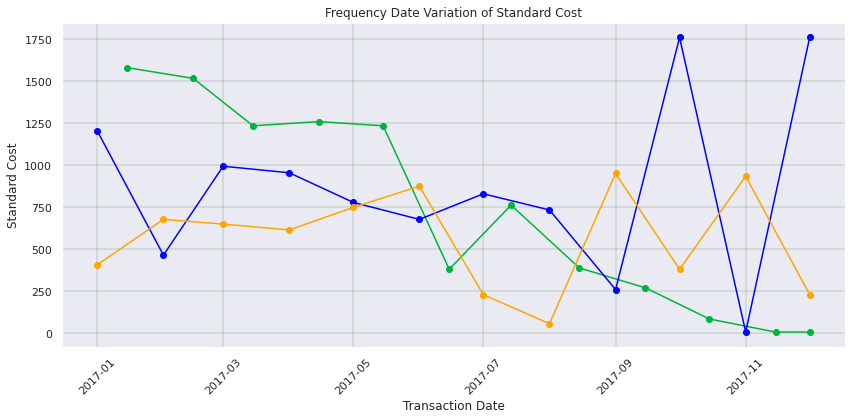

In [35]:
plt.rcParams['figure.figsize'] = (12,6)
plt.plot_date(df_transactions.loc[[5281,17226,19052,18885,1393,3897,18068,11958,14803,4191,10946,8509],
                                       "transaction_date"], 
              df_transactions.loc[[5281,17226,19052,18885,1393,3897,18068,11958,14803,4191,10946,8509],
                                       "standard_cost"], 
              linestyle="solid",
              color="#00b33c"
             )
date_order = pd.date_range(start="2017-01-01", end="2017-12-30",freq="MS")
plt.plot_date(date_order, 
              df_transactions.loc[[2770,595,622,18541,1455,8380,972,9724,232,4272,18540,6281],
                                       "standard_cost"], 
              linestyle="solid",
              color="blue")

date2_order = pd.date_range(start="2017-01-01",periods=12, freq="MS")
plt.plot_date(date2_order, 
              df_transactions.loc[[10065,5127,14784,3943,1015,3447,907,13809,7442,1320,19973,19709],
                                       "standard_cost"], 
              linestyle="solid",
              color="orange")
plt.xticks(rotation=45)
plt.grid(b=True, color='#004d00', linestyle='-', linewidth=0.2)
plt.xlabel("Transaction Date")
plt.ylabel("Standard Cost")
plt.title("Frequency Date Variation of Standard Cost")
plt.tight_layout()
plt.show()

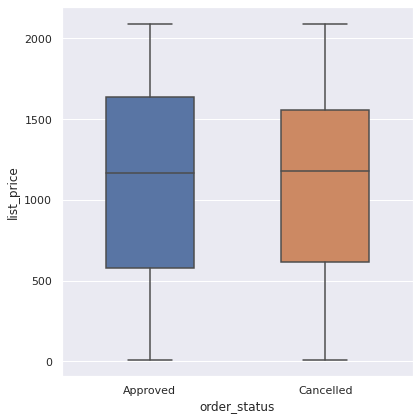

In [36]:
plt.rcParams['figure.figsize'] = (6,6)
sns.boxplot(x="order_status", y="list_price", 
data=df_transactions, width=0.5)
plt.tight_layout()
plt.show()

In [37]:
df_transactions["product_class"].value_counts()

medium    13826
high       3013
low        2964
Name: product_class, dtype: int64

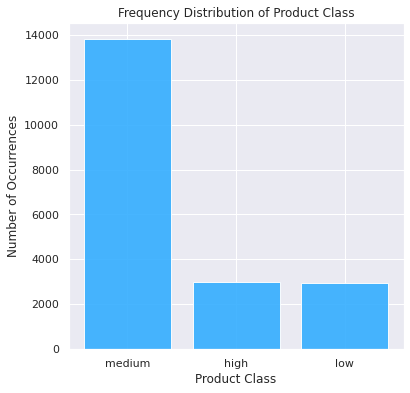

In [38]:
product_class_count = df_transactions["product_class"].value_counts()
plt.bar(product_class_count.index, product_class_count.values, color ="#33adff",alpha=0.9)
plt.title('Frequency Distribution of Product Class')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Product Class', fontsize=12)
plt.show()

Counting the number of bike and cycling accessories in each cell defined by a combination of brand type and the general order status classification:

In [39]:
pd.crosstab(df_transactions.order_status, df_transactions.brand)

brand,Giant Bicycles,Norco Bicycles,OHM Cycles,Solex,Trek Bicycles,WeareA2B
order_status,,,,,,
Approved,3283,2885,3016,4211,2965,3265
Cancelled,29,25,27,42,25,30


Count missing values for each column of the dataframe transactions

In [40]:
df_transactions.isna().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

Dropping rows with null values

In [41]:
df_transactions.dropna(axis=0, inplace=True)

In [42]:
df_transactions.isnull().sum()

transaction_id             0
product_id                 0
customer_id                0
transaction_date           0
online_order               0
order_status               0
brand                      0
product_line               0
product_class              0
product_size               0
list_price                 0
standard_cost              0
product_first_sold_date    0
dtype: int64

Checking duplicates values

In [43]:
df_transactions.duplicated().any()

False

# Converting the float to datetime format 


In [44]:
df_transactions["product_first_sold_date"] =  pd.to_datetime(df_transactions["product_first_sold_date"],format="%Y-%m-%d").dt.date

In [45]:
df_transactions["product_first_sold_date"].unique()

array([datetime.date(1970, 1, 1)], dtype=object)

In [46]:
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19445 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           19445 non-null  int64         
 1   product_id               19445 non-null  int64         
 2   customer_id              19445 non-null  int64         
 3   transaction_date         19445 non-null  datetime64[ns]
 4   online_order             19445 non-null  float64       
 5   order_status             19445 non-null  object        
 6   brand                    19445 non-null  object        
 7   product_line             19445 non-null  object        
 8   product_class            19445 non-null  object        
 9   product_size             19445 non-null  object        
 10  list_price               19445 non-null  float64       
 11  standard_cost            19445 non-null  float64       
 12  product_first_sold_date  19445 n

In [47]:
df_transactions.tail()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
19995,19996,51,1018,2017-06-24,1.0,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,1970-01-01
19996,19997,41,127,2017-11-09,1.0,Approved,Solex,Road,medium,medium,416.98,312.74,1970-01-01
19997,19998,87,2284,2017-04-14,1.0,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,1970-01-01
19998,19999,6,2764,2017-07-03,0.0,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,1970-01-01
19999,20000,11,1144,2017-09-22,1.0,Approved,Trek Bicycles,Standard,medium,small,1775.81,1580.47,1970-01-01


In [48]:
df_customer_demographic = pd.read_excel("../input/kpmg-virtual-internship-program/KPMG.xlsx", engine="openpyxl",
sheet_name="CustomerDemographic", parse_dates=["DOB"])

In [49]:
df_customer_demographic = df_customer_demographic.drop(df_customer_demographic.iloc[:,13:256], axis=1)

In [50]:
df_customer_demographic.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [51]:
df_customer_demographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

In [52]:
df_customer_demographic.deceased_indicator.value_counts()

N    3998
Y       2
Name: deceased_indicator, dtype: int64

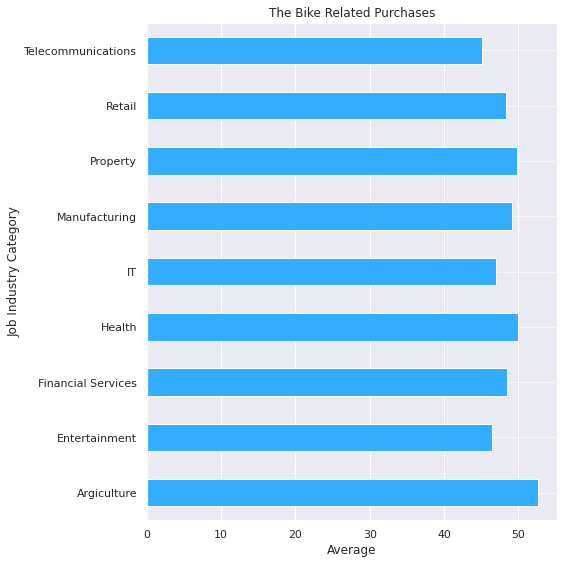

In [53]:
plt.rcParams['figure.figsize'] = (8,8)
df_customer_demographic.groupby("job_industry_category").past_3_years_bike_related_purchases.mean().plot(kind="barh", color="#33adff")
plt.grid(axis = "y",alpha=0.70)
plt.xlabel("Average")
plt.ylabel("Job Industry Category")
plt.title("The Bike Related Purchases")
plt.tight_layout()
plt.show()

In [54]:
df_customer_demographic.groupby("job_industry_category").past_3_years_bike_related_purchases.agg(["count","mean"])

,count,mean
job_industry_category,,
Argiculture,113,52.610619
Entertainment,136,46.470588
Financial Services,774,48.440568
Health,602,49.923588
IT,223,46.955157
Manufacturing,799,49.151439
Property,267,49.790262
Retail,358,48.326816
Telecommunications,72,45.055556


In [55]:
#Drop the column default
df_customer_demographic.drop(["default"], axis=1, inplace=True)

In [56]:
df_customer_demographic.isna().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                  87
dtype: int64

In [57]:
df_customer_demographic.dropna(axis = 0, inplace=True)

In [58]:
df_customer_demographic.isnull().values.any()

False

In [59]:
df_customer_demographic.duplicated().any()

False

Creating a dictionary using the old values that we want to change as keys and the new values as dictionary values

In [60]:
gender_dict = {"F":"Female","Femal":"Female","Female":"Female","M":"Male", "Male":"Male","U":"Unknown" }

In [61]:
for keys, values in gender_dict.items():
    print(keys,":", values)

F : Female
Femal : Female
Female : Female
M : Male
Male : Male
U : Unknown


#  Using apply() function to change values of the columns gender:

In [62]:
df_customer_demographic["gender"] = df_customer_demographic["gender"].apply(lambda x: gender_dict[x])

In [63]:
df_customer_demographic.groupby("gender").past_3_years_bike_related_purchases.agg(["count","mean"])

,count,mean
gender,,
Female,1446,48.418396
Male,1333,50.561140
Unknown,1,59.000000


In [64]:
df_customer_demographic.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0
8,9,Mala,Lind,Female,97,1973-03-10,Business Systems Development Analyst,Argiculture,Affluent Customer,N,Yes,8.0
9,10,Fiorenze,Birdall,Female,49,1988-10-11,Senior Quality Engineer,Financial Services,Mass Customer,N,Yes,20.0


In [65]:
average_bike_related_purchases = df_customer_demographic.groupby(["customer_id","gender","job_title"], as_index=False).past_3_years_bike_related_purchases.mean()
average_bike_related_purchases.sample(n=10)

,customer_id,gender,job_title,past_3_years_bike_related_purchases
1441,2028,Female,Director of Sales,25.0
2509,3583,Female,Assistant Professor,71.0
2591,3709,Female,GIS Technical Architect,31.0
1347,1891,Male,Marketing Manager,6.0
779,1094,Male,Dental Hygienist,48.0
469,634,Female,Speech Pathologist,35.0
840,1181,Female,Tax Accountant,2.0
1321,1852,Female,Research Associate,22.0
2468,3520,Male,Research Nurse,41.0
523,717,Male,VP Product Management,65.0


In [66]:
df_customer_demographic.shape

(2780, 12)

In [67]:
df_customer_address = pd.read_excel("../input/kpmg-virtual-internship-program/KPMG.xlsx",engine="openpyxl", sheet_name="CustomerAddress")

In [68]:
df_customer_address = df_customer_address.drop(df_customer_address.iloc[:,6:256], axis=1)

In [69]:
df_customer_address.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [70]:
df_customer_address.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [71]:
df_customer_address["state"].unique()

array(['New South Wales', 'QLD', 'VIC', 'NSW', 'Victoria'], dtype=object)

Creating a dictionary using to remap the values in the state column

In [72]:
dict = {"New South Wales" : "NSW", "QLD" : "QLD", "VIC" : "VIC", "NSW" : "NSW", "Victoria":"VIC"}

# Remap the values of the state column:

In [73]:
df_customer_address["state"] = df_customer_address["state"].map(dict)

Property Valuations is a trusted company with a completely independent network of valuers providing property valuations throughout Australia :

In [74]:
df_customer_address.groupby("state").property_valuation.agg(["count","mean"])

,count,mean
state,,
NSW,2140,8.391589
QLD,838,5.569212
VIC,1021,7.272282


In [75]:
df_customer_address.isna().sum()

customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64

Combining Datasets 
Merge

In [76]:
dataframes = [df_transactions,df_customer_demographic,df_customer_address]

In [77]:
df_customers = reduce(lambda left, right: pd.merge(left, right, on='customer_id', how='outer'), dataframes)

In [78]:
df_customers.isna().sum()

transaction_id                          512
product_id                              512
customer_id                               0
transaction_date                        512
online_order                            512
order_status                            512
brand                                   512
product_line                            512
product_class                           512
product_size                            512
list_price                              512
standard_cost                           512
product_first_sold_date                 512
first_name                             5978
last_name                              5978
gender                                 5978
past_3_years_bike_related_purchases    5978
DOB                                    5978
job_title                              5978
job_industry_category                  5978
wealth_segment                         5978
deceased_indicator                     5978
owns_car                        

In [79]:
df_customers.dropna(axis=0,how='any',inplace=True)

In [80]:
df_customers.isnull().sum().sum()

0

In [81]:
df_customers.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation'],
      dtype='object')

In [82]:
df_customers["DOB"].min()

Timestamp('1843-12-21 00:00:00')

In [83]:
df_customers["DOB"].max()

Timestamp('2002-03-11 00:00:00')

In [84]:
df2_customers = df_customers[df_customers["DOB"]!="1843-12-21"]

In [85]:
df2_customers["DOB"].dt.year

0        1955
1        1955
2        1955
3        1979
4        1979
         ... 
19437    1967
19441    1976
19442    1976
19443    1976
19444    1976
Name: DOB, Length: 13628, dtype: int64

# Calculating customers age


In [86]:
pd.options.mode.chained_assignment = None 
today = datetime.today()
df2_customers.loc[:,"age"] = df2_customers.loc[:,"DOB"].apply(lambda x: today.year - x.year - 
                                   ((today.month, today.day) < (x.month, x.day)))

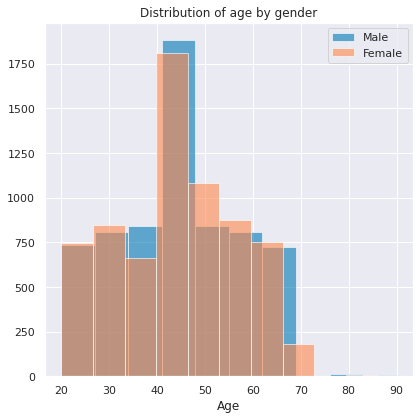

In [87]:
plt.rcParams['figure.figsize'] = (6,6)
plt.hist("age", data=df2_customers[df2_customers["gender"] == "Male"], color="#0077b3",alpha=0.6, label="Male")
plt.hist("age", data=df2_customers[df2_customers["gender"] == "Female"],color="#ff884d", alpha=0.6, label="Female")
plt.title("Distribution of age by gender");
plt.xlabel("Age")
plt.legend()
plt.tight_layout()
plt.show()

The Count of customers by, id,transaction_date,state, gender and age

In [88]:
n_by = df2_customers.groupby(["customer_id","transaction_date","state","gender","age"])["last_name"].count()
n_by.head(n=20)

customer_id  transaction_date  state  gender  age
1            2017-01-05        NSW    Female  68     1
             2017-02-21        NSW    Female  68     1
             2017-03-27        NSW    Female  68     1
             2017-03-29        NSW    Female  68     1
             2017-04-06        NSW    Female  68     1
             2017-05-11        NSW    Female  68     1
             2017-05-19        NSW    Female  68     1
             2017-06-04        NSW    Female  68     1
             2017-12-09        NSW    Female  68     1
             2017-12-14        NSW    Female  68     1
             2017-12-23        NSW    Female  68     1
2            2017-05-04        NSW    Male    41     1
             2017-06-11        NSW    Male    41     1
             2017-08-24        NSW    Male    41     1
9            2017-02-04        NSW    Female  49     1
             2017-03-06        NSW    Female  49     1
             2017-05-10        NSW    Female  49     1
             20

In [89]:
df2_customers = df2_customers.loc[:,['transaction_id', 'product_id','transaction_date', 'customer_id',
                                    'first_name', 'last_name', 'gender','age','DOB','online_order', 'order_status', 
                                    'brand', 'product_line','product_class', 'product_size', 'list_price', 'standard_cost',
                                    'product_first_sold_date', 'past_3_years_bike_related_purchases', 'job_title','job_industry_category', 
                                    'wealth_segment', 'deceased_indicator','owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
                                    'property_valuation']]

In [90]:
df2_customers["property_valuation"] = df2_customers["property_valuation"].astype('Int64')

In [91]:
df2_customers.shape

(13628, 30)

In [92]:
df2_customers.duplicated().any()

False

# The products purchased by customers.

# Counts the number of bike and cycling accessories by id,order status, name, gender, age, state and brand:

In [93]:
products_purchased_customers = df2_customers.groupby(
    ["customer_id","order_status","first_name","last_name","gender","age","state","brand"])["brand"].count()
products_purchased_customers.head(n=20)

customer_id  order_status  first_name  last_name  gender  age  state  brand         
1            Approved      Laraine     Medendorp  Female  68   NSW    Giant Bicycles    4
                                                                      Norco Bicycles    2
                                                                      OHM Cycles        2
                                                                      Solex             2
                                                                      Trek Bicycles     1
2            Approved      Eli         Bockman    Male    41   NSW    Giant Bicycles    1
                                                                      WeareA2B          2
9            Approved      Mala        Lind       Female  49   NSW    Giant Bicycles    1
                                                                      OHM Cycles        1
                                                                      Solex             3
               

Gender is one of the factors that affects consumer purchasing behaviour

Counting the number of brand purchasing by gender

In [94]:
pd.crosstab(df2_customers.gender, df2_customers.brand)

brand,Giant Bicycles,Norco Bicycles,OHM Cycles,Solex,Trek Bicycles,WeareA2B
gender,,,,,,
Female,1143,1011,1058,1527,1070,1153
Male,1129,1000,1039,1424,1002,1072


In [95]:
df3_customers = df2_customers.drop(columns = ["transaction_id","product_id"],
        inplace = False)

In [96]:
df3_customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13628 entries, 0 to 19444
Data columns (total 28 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_date                     13628 non-null  datetime64[ns]
 1   customer_id                          13628 non-null  int64         
 2   first_name                           13628 non-null  object        
 3   last_name                            13628 non-null  object        
 4   gender                               13628 non-null  object        
 5   age                                  13628 non-null  int64         
 6   DOB                                  13628 non-null  datetime64[ns]
 7   online_order                         13628 non-null  float64       
 8   order_status                         13628 non-null  object        
 9   brand                                13628 non-null  object        
 10  product_li

Customer Segmentation as practice of dividing a customer base into groups of individuals. 
That are similar in specific way relevant to the marketing team

Hierarchical clustering is the hierarchical decomposition of the data based on group similarities


Sample Selection to  Customer Segmentation by State

In [97]:
X= df2_customers.loc[:, ["state","list_price","standard_cost"]]
X.head()

,state,list_price,standard_cost
0,VIC,71.49,53.62
1,VIC,1403.50,954.82
2,VIC,478.16,298.72
3,NSW,2091.47,388.92
4,NSW,1129.13,677.48


In [98]:
X2 = X.loc[:,["list_price", "standard_cost"]]

Preparing Data for Clusters

In [99]:
data_normalize = normalize(X2)
data_normalize = pd.DataFrame(data_normalize, columns=X2.columns)
data_normalize.head()

,list_price,standard_cost
0,0.799987,0.600018
1,0.826806,0.562487
2,0.848102,0.529833
3,0.983146,0.182821
4,0.857492,0.514497


In [100]:
data_normalize.index = X[X.columns[0]]

In [101]:
data_normalize.tail()

,list_price,standard_cost
state,,
QLD,0.883284,0.468838
QLD,0.981970,0.189036
QLD,0.951336,0.308157
QLD,0.983146,0.182821
QLD,0.983146,0.182821


# The hierarchical structure of a dendrogram represents the data itself can be judged by the cophenetic correlation coefficient 

The cophenetic correlation for a cluster tree is defined as the linear correlation coefficient between the cophenetic distances obtained from the tree, and the original distances (or dissimilarities) used to construct the tree. Thus, it is a measure of how faithfully the tree represents the dissimilarities among observations.

The cophenetic distance between two observations is represented in a dendrogram by the height of the link at which those two observations are first joined. That height is the distance between the two subclusters that are merged by that link.

The output value, c, is the cophenetic correlation coefficient. The magnitude of this value should be very close to 1 for a high-quality solution. This measure can be used to compare alternative cluster solutions obtained using different algorithms.

Similarity measures 
This will certainly infleence the shape of the clusters.

Valiable Numerical: Use a variation of the Manhattan, City block, or Euclidean distance.

Computing the cophenetic correlation coefficient for the hierarchical cluster tree represented by Z. Z is the output of the linkage function. 
Y contains the distances or dissimilarities used to construct Z, as output by the pdist function:

In [102]:
Y = pdist(data_normalize, 'euclidean')
Z = linkage(Y,'ward')

In [103]:
c = cophenet(Z,Y)
c

(0.8263353870199551,
 array([ 1.51242898,  9.80271574, 30.63013954, ...,  9.95088702,
         9.95088702,  0.        ]))

The cophenetic distances d in the same lower triangular distance vector format as Y

In [104]:
[c,d] = cophenet(Z,Y)
[c,d]

[0.8263353870199551,
 array([ 1.51242898,  9.80271574, 30.63013954, ...,  9.95088702,
         9.95088702,  0.        ])]

In [105]:
linkage_matrix = hierarchy.linkage(data_normalize,method="ward", metric="euclidean")

# Segmentation Geografic

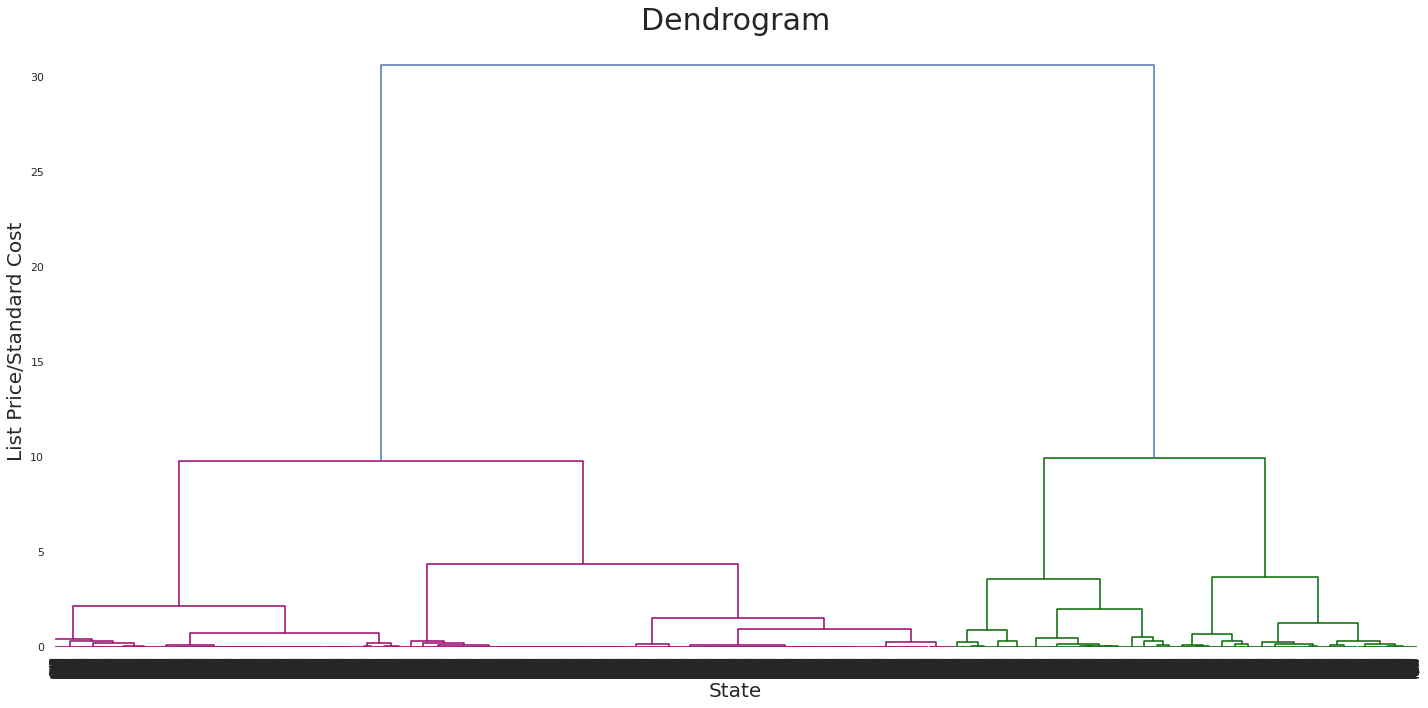

In [106]:
hierarchy.set_link_color_palette(["#990066", "#006600", "#ff8000", " #001a00","#b33c00","#00ffff"])
plt.figure(figsize=(20,10))
plt.title("Dendrogram", fontsize=30)
plt.xlabel("State", fontsize=20)
plt.ylabel("List Price/Standard Cost", fontsize=20)
hierarchy.dendrogram(linkage_matrix, 
         labels=data_normalize.index,
         leaf_rotation=90.,
         leaf_font_size =9.,
         distance_sort = True,
         show_contracted=True
          )
hierarchy.set_link_color_palette(None)
plt.tight_layout()
plt.show()

In [107]:
data_normalize.index.unique()

Index(['VIC', 'NSW', 'QLD'], dtype='object', name='state')

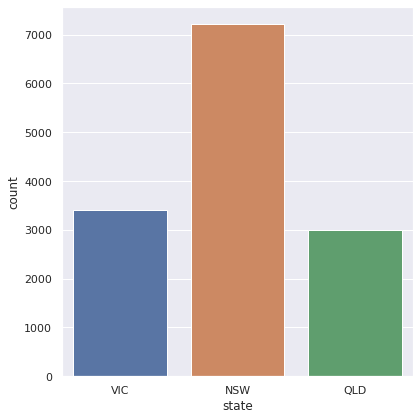

In [108]:
sns.countplot(x=data_normalize.index,data=data_normalize)
plt.tight_layout()
plt.show()

# Plot a matrix dataset as a hierarchically-clustered heatmap:

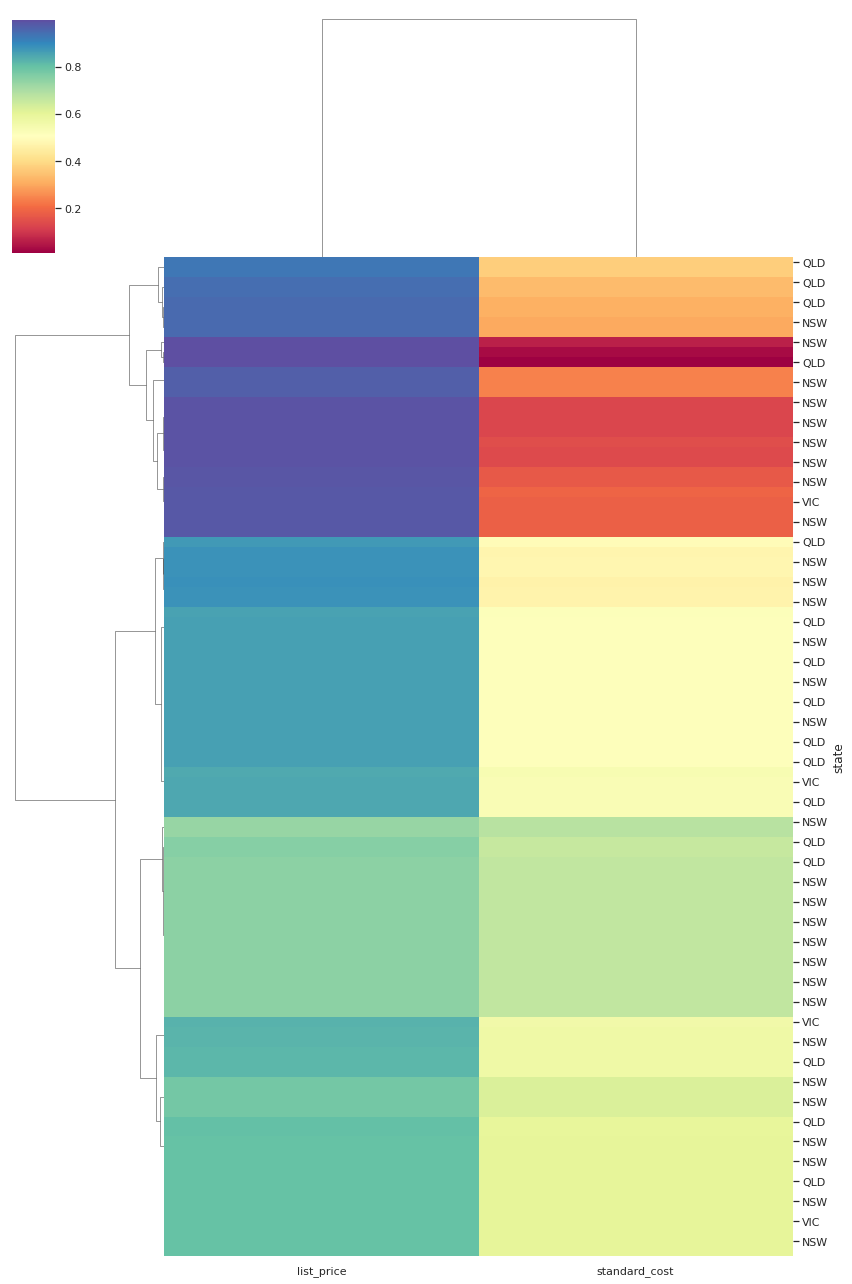

In [109]:
sns.clustermap(data_normalize[:100],method="ward",figsize=(12,18),cmap="Spectral")
plt.show()

In [110]:
clustering = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage ='ward')

In [111]:
cluster_predict = clustering.fit_predict(data_normalize)

In [112]:
print(cluster_predict[0:20])

[0 0 3 1 3 0 0 3 0 2 1 0 1 1 0 3 2 0 3 0]


In [124]:
metrics.adjusted_rand_score(data_normalize.index, cluster_predict)

0.000656713948633852

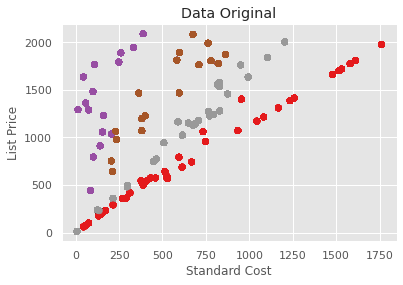

In [133]:
with plt.style.context("ggplot"):
    plt.scatter(x=X["standard_cost"], y=X["list_price"],c=clustering.labels_, cmap="Set1")
    plt.title("Data Original")
    plt.xlabel("Standard Cost")
    plt.ylabel("List Price")
plt.show()

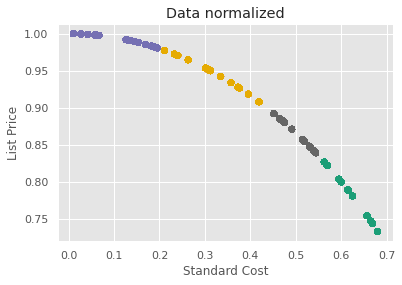

In [134]:
with plt.style.context("ggplot"):
    plt.scatter(x=data_normalize["standard_cost"], y=data_normalize["list_price"],c=clustering.labels_, cmap="Dark2")
    plt.title("Data normalized")
    plt.xlabel("Standard Cost")
    plt.ylabel("List Price")
plt.show()

# Sample Selection to  Customer Segmentation by Job Industry Category :

# Occupational Area

In [135]:
X3 = df2_customers.loc[0:4000, ["job_industry_category","brand","wealth_segment"]]
X3.head()

,job_industry_category,brand,wealth_segment
0,Financial Services,Solex,Mass Customer
1,Financial Services,Giant Bicycles,Mass Customer
2,Financial Services,Solex,Mass Customer
3,Health,Trek Bicycles,Mass Customer
4,Health,Giant Bicycles,Mass Customer


In [136]:
X3 = pd.get_dummies(X3, columns=["brand"])

In [137]:
X3 = pd.get_dummies(X3, columns=["wealth_segment"])

In [138]:
X3.index = X3[X3.columns[0]]
X3.sample(n=5)

,job_industry_category,brand_Giant Bicycles,brand_Norco Bicycles,brand_OHM Cycles,brand_Solex,brand_Trek Bicycles,brand_WeareA2B,wealth_segment_Affluent Customer,wealth_segment_High Net Worth,wealth_segment_Mass Customer
job_industry_category,,,,,,,,,,
Argiculture,Argiculture,0,0,0,1,0,0,0,0,1
Manufacturing,Manufacturing,0,0,0,0,0,1,0,0,1
Health,Health,1,0,0,0,0,0,0,1,0
Manufacturing,Manufacturing,1,0,0,0,0,0,0,0,1
Health,Health,0,1,0,0,0,0,0,0,1


In [139]:
X3 = X3.drop(columns=["job_industry_category"],axis=1)

# For nonquntitative attributes(categorical data), Euclidean distance may not be appropriate.
# Binary: Use Manhattan, Jaccard or Hamming distance
# Computes the Jaccard distance between the points
# In addition, it is sometimes desirable the weight:

In [140]:
Y2 = pdist(X3, 'jaccard');
Z2 = linkage(Y2,'weighted');

In [141]:
[c2,d2] = cophenet(Z2,Y2)
[c2,d2]

[0.9252224159121559,
 array([0.66666667, 0.        , 0.66666667, ..., 0.        , 0.66666667,
        0.66666667])]

In [142]:
linkage_matrix2 = hierarchy.linkage(X3,method="weighted", metric="jaccard")

# Segmentation Demographic 
# Occupation 

In [143]:
X3.index.unique()

Index(['Financial Services', 'Health', 'Retail', 'Property', 'Manufacturing',
       'Entertainment', 'IT', 'Argiculture', 'Telecommunications'],
      dtype='object', name='job_industry_category')

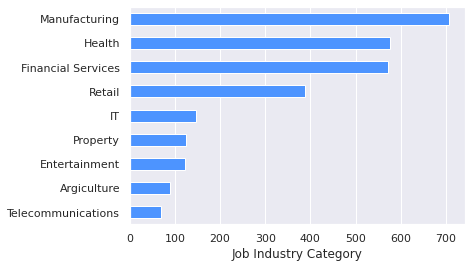

In [144]:
X3.index.value_counts(ascending=True).plot(kind="barh",
                             color="#4d94ff")
plt.grid(b=False, axis="y")
plt.xlabel("Job Industry Category")
plt.show()

# Clustermap  chart :

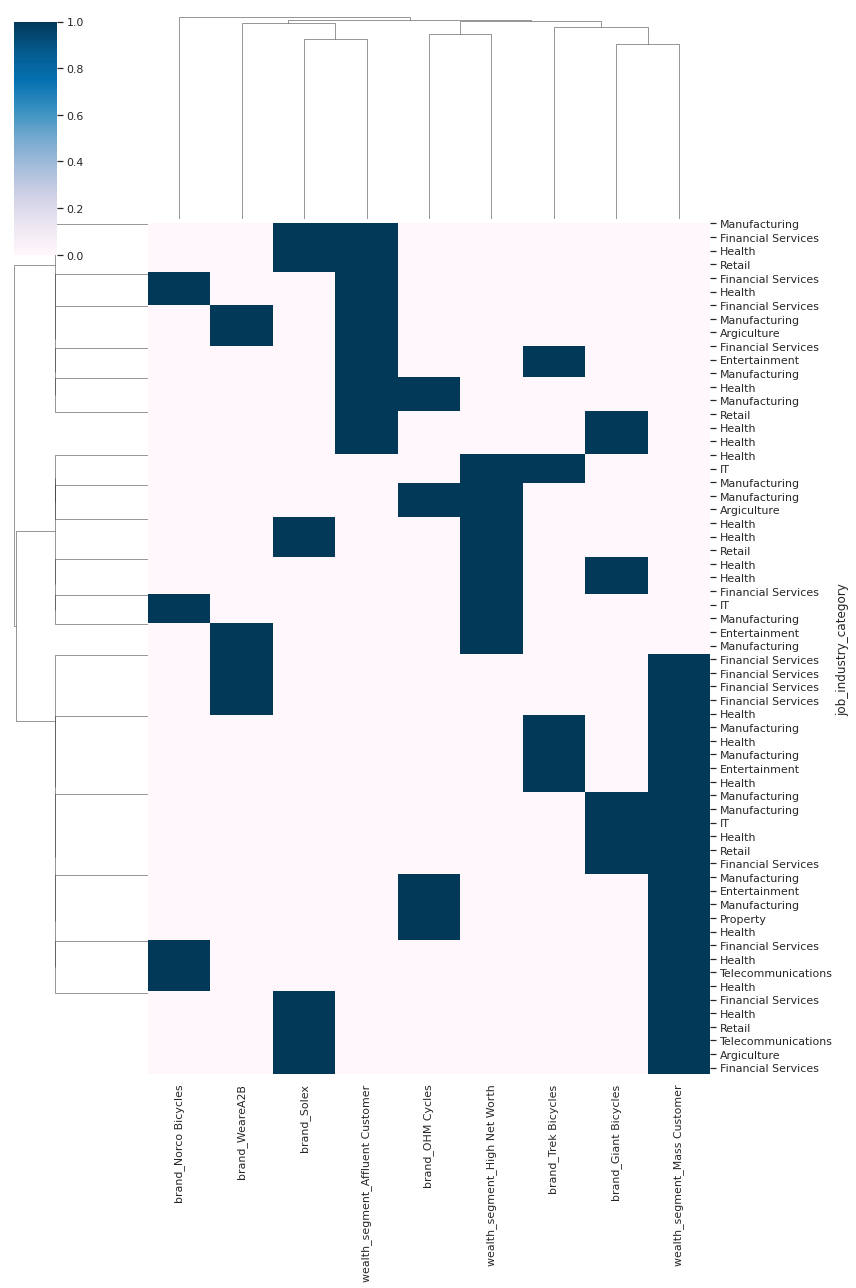

In [145]:
sns.clustermap(X3[0:1000],method="weighted",metric="jaccard",figsize=(12,18),cmap="PuBu")
plt.show()

In [146]:
clustering2 = AgglomerativeClustering(n_clusters = 2, affinity = "jaccard", linkage ="complete")

In [147]:
cluster2_predict = clustering2.fit_predict(X3)

In [148]:
print(cluster2_predict[0:20])

[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0]


In [150]:
metrics.adjusted_rand_score(X3.index, cluster2_predict)

0.0024357340511328386

# k-Means clustering
k-Means clustering is one of the simplest and most commonly used clustering algorithms. 

It tries to find cluster centers that are representative of certain regions of the
data.

The algorithm alternates between two steps:

assigning each data point to the closest cluster center, and then setting each cluster center as the mean of the data points that
are assigned to it.

In [151]:
cluster3 = df2_customers.loc[1000:3000,['age','past_3_years_bike_related_purchases']]

In [152]:
scaler_features = StandardScaler()
scaler_features = scaler_features.fit_transform(cluster3)

## Choosing the Appropriate Number of Clusters

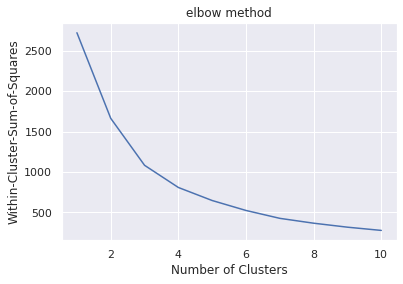

In [153]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, init = 'k-means++', max_iter = 300, n_init = 10)
    kmeans.fit(scaler_features)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title("elbow method")
plt.xlabel("Number of Clusters")
plt.ylabel("Within-Cluster-Sum-of-Squares")
plt.show()

In [154]:
kmeans = KMeans(
    init='k-means++',
    n_clusters=4,
    n_init=10,
    max_iter=300,
    random_state=42
   )

In [156]:
kmeans.fit(scaler_features)

KMeans(n_clusters=4, random_state=42)

In [157]:
print(kmeans.labels_)

[1 1 1 ... 0 0 0]


In [159]:
kmeans_labels = kmeans.fit_predict(scaler_features)

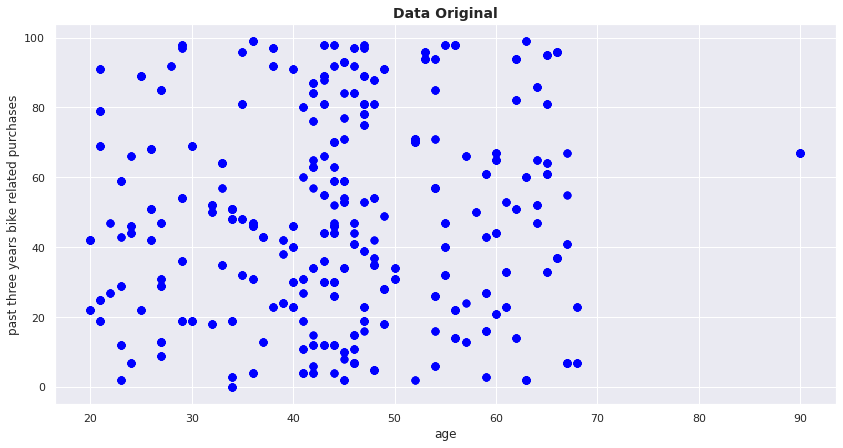

In [160]:
plt.figure(figsize=(14,7))
plt.scatter(df2_customers.loc[1000:3000,'age'],df2_customers.loc[1000:3000,'past_3_years_bike_related_purchases'], c="blue", cmap="Set1",s=50)
plt.xlabel('age')
plt.ylabel('past three years bike related purchases')
plt.title('Data Original',fontsize=14, fontweight='bold')
plt.show()

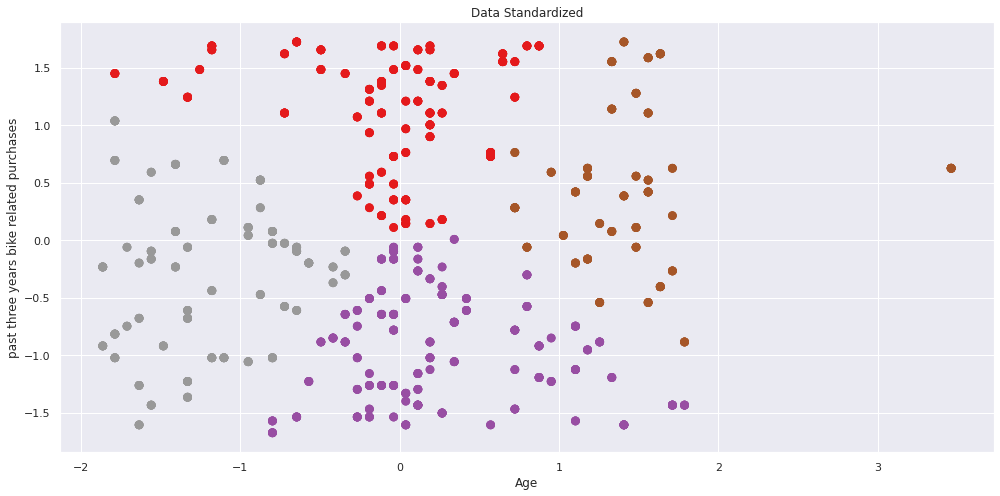

In [162]:
plt.figure(figsize=(14,7))
plt.scatter(scaler_features[:, 0], scaler_features[:, 1], c=kmeans.labels_, cmap="Set1", s=60)
plt.title("Data Standardized")
plt.xlabel("Age")
plt.ylabel("past three years bike related purchases")
plt.tight_layout()
plt.show()

Reference: 

https://realpython.com/k-means-clustering-python/